In [1]:
# Importamos Pandas para trabajar
import pandas as pd

In [2]:
# Convertimos el CSV en un DataFrame
df = pd.read_csv("Dollar.csv")

In [3]:
# Obtenemos las primeras filas para familiarizarnos con los datos
df.head(5)

,Date,Dollar_Exchange_Rate,Monthly_Change,12-Month_Change
0,2001-10-01,13.65,0.000000,0.0
1,2001-10-02,13.70,0.366300,0.0
2,2001-10-03,13.80,0.729927,0.0
3,2001-10-04,14.00,1.449275,0.0
4,2001-10-05,14.00,0.000000,0.0


In [4]:
# También las últimas
df.tail(5)

,Date,Dollar_Exchange_Rate,Monthly_Change,12-Month_Change
5597,2024-09-27,41.55,-0.953516,2.466091
5598,2024-09-30,41.60,0.120337,1.463415
5599,2024-10-01,41.75,0.360577,2.078240
5600,2024-10-02,41.80,0.119760,2.450980
5601,2024-10-03,41.75,-0.119617,1.829268


In [5]:
# Y una muestra
df.sample(5)

,Date,Dollar_Exchange_Rate,Monthly_Change,12-Month_Change
5087,2022-08-31,40.85,0.492005,1.490683
2500,2011-12-28,20.05,0.250000,0.501253
4500,2020-04-14,43.60,1.160093,-3.858875
2683,2012-09-27,21.05,-0.472813,-1.173709
1732,2008-11-03,23.25,0.540541,5.442177


## INVESTIGUEMOS LAS FECHAS

In [6]:
# La columna Date se traduce a valores de tiempo reales 
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

In [7]:
# Agreguemos algunos tags temporales
df["Day_Name"] = pd.to_datetime(df["Date"]).dt.day_name()
df["Month_Name"] = pd.to_datetime(df["Date"]).dt.month_name()
df["Day"] = pd.to_datetime(df["Date"]).dt.day
df["Month"] = pd.to_datetime(df["Date"]).dt.month
df["Year"] = pd.to_datetime(df["Date"]).dt.year

In [8]:
# No hay ocurrencias donde las fechas no avancen en el sentido lógico
(df["Date"].shift(1) > df["Date"]).any()

np.False_

In [9]:
# No hay gaps inexplicables en las fechas. Todos correctamente registrados, y en su mayoría explicados por semana santa
mercados_cerrados = df[((df["Date"] - df["Date"].shift(1)) > pd.Timedelta(days=5))].copy()
mercados_cerrados["Market_Closed_Count"] = (df["Date"] - df["Date"].shift(1)).dt.days
mercados_cerrados[["Day","Month","Year","Market_Closed_Count"]].sort_values(["Market_Closed_Count","Month"], ascending=False)

,Day,Month,Year,Market_Closed_Count
1108,18,4,2006,11.0
3766,18,4,2017,11.0
4258,23,4,2019,11.0
4994,19,4,2022,11.0
119,1,4,2002,10.0
375,21,4,2003,10.0
616,12,4,2004,10.0
1346,9,4,2007,10.0
1837,13,4,2009,10.0
2070,5,4,2010,10.0


In [10]:
# No deberíamos observar variaciones en fin de semana, puesto que los mercados no abren
df["Day_Name"].value_counts()

Day_Name
Thursday     1144
Wednesday    1137
Friday       1135
Tuesday      1117
Monday       1067
Saturday        2
Name: count, dtype: int64

In [11]:
# Dos sábados?
df[df["Day_Name"]=="Saturday"]

,Date,Dollar_Exchange_Rate,Monthly_Change,12-Month_Change,Day_Name,Month_Name,Day,Month,Year
2733,2012-12-08,19.45,0.000000,-1.017812,Saturday,December,8,12,2012
4930,2022-01-08,44.55,-0.446927,0.450958,Saturday,January,8,1,2022


In [12]:
# Según el BCU (Banco Central del Uruguay), durante la semana del lunes 3 de enero del 2021,
# el mercado operó por última vez el día 7 (viernes). Y no el sábado 8.
df.loc[(4930-5):(4930+5)]

,Date,Dollar_Exchange_Rate,Monthly_Change,12-Month_Change,Day_Name,Month_Name,Day,Month,Year
4925,2021-12-30,44.75,0.674916,1.129944,Thursday,December,30,12,2021
4926,2021-12-31,44.70,-0.111732,0.902935,Friday,December,31,12,2021
4927,2022-01-03,44.70,0.000000,0.675676,Monday,January,3,1,2022
4928,2022-01-04,44.60,-0.223714,0.337458,Tuesday,January,4,1,2022
4929,2022-01-05,44.75,0.336323,1.015801,Wednesday,January,5,1,2022
4930,2022-01-08,44.55,-0.446927,0.450958,Saturday,January,8,1,2022
4931,2022-01-10,44.55,0.000000,0.450958,Monday,January,10,1,2022
4932,2022-01-11,44.70,0.336700,0.675676,Tuesday,January,11,1,2022
4933,2022-01-12,44.65,-0.111857,0.563063,Wednesday,January,12,1,2022
4934,2022-01-13,44.65,0.000000,0.563063,Thursday,January,13,1,2022


In [13]:
# Ajustamos esa fecha
df.loc[4930, "Date"] = pd.to_datetime("2022-01-07")
df.loc[4930, "Day_Name"] = df.loc[4930, "Date"].day_name()
df.loc[4930, "Day"] = df.loc[4930, "Date"].day

In [14]:
# Aquí las fechas se corresponden, el valor parece simplemente haber sido agregado
df.loc[(2733-5):(2733+5)]

,Date,Dollar_Exchange_Rate,Monthly_Change,12-Month_Change,Day_Name,Month_Name,Day,Month,Year
2728,2012-12-03,19.65,0.000000,-1.007557,Monday,December,3,12,2012
2729,2012-12-04,19.50,-0.763359,-1.265823,Tuesday,December,4,12,2012
2730,2012-12-05,19.45,-0.256410,-1.143583,Wednesday,December,5,12,2012
2731,2012-12-06,19.45,0.000000,-1.017812,Thursday,December,6,12,2012
2732,2012-12-07,19.45,0.000000,-1.269036,Friday,December,7,12,2012
2733,2012-12-08,19.45,0.000000,-1.017812,Saturday,December,8,12,2012
2734,2012-12-10,19.45,0.000000,-1.269036,Monday,December,10,12,2012
2735,2012-12-11,19.10,-1.799486,-3.045685,Tuesday,December,11,12,2012
2736,2012-12-12,19.15,0.261780,-2.791878,Wednesday,December,12,12,2012
2737,2012-12-13,19.20,0.261097,-2.784810,Thursday,December,13,12,2012


In [15]:
# Lo eliminamos
df = df.drop([2733]).reset_index(drop=True)

In [16]:
# Ahora buscamos fechas duplicadas
df[df["Date"].duplicated()]

,Date,Dollar_Exchange_Rate,Monthly_Change,12-Month_Change,Day_Name,Month_Name,Day,Month,Year
3286,2015-03-27,25.775,0.0,2.689243,Friday,March,27,3,2015


In [17]:
# También eliminamos este registro
df = df.drop([3286]).reset_index(drop=True)

## AHORA REVISEMOS LOS VALORES NUMÉRICOS

In [18]:
# Método describe
df[["Dollar_Exchange_Rate","Monthly_Change","12-Month_Change"]].describe()

,Dollar_Exchange_Rate,Monthly_Change,12-Month_Change
count,5600.000000,5600.000000,5600.000000
mean,28.203692,0.022222,0.264942
std,7.975433,0.683075,2.517113
min,13.650000,-7.843137,-14.173228
25%,21.800000,-0.208333,-0.832034
50%,26.750000,0.000000,0.000000
75%,32.820000,0.208333,0.935612
max,46.100000,21.588089,36.111111


In [19]:
# Como sobresaliente, observamos una variación mensual máxima con un valor extremo
df[df["Monthly_Change"]==df["Monthly_Change"].max()]

,Date,Dollar_Exchange_Rate,Monthly_Change,12-Month_Change,Day_Name,Month_Name,Day,Month,Year
189,2002-07-11,24.5,21.588089,32.432432,Thursday,July,11,7,2002


In [20]:
# Función para calcular desviación porcentual
def desvPorcentual(filaA, filaB):
    rateA = filaA["Dollar_Exchange_Rate"].squeeze()
    rateB = filaB["Dollar_Exchange_Rate"].squeeze()

    desv = (rateB - rateA)/rateA*100
    return desv

In [21]:
# Algo parece estar mal
from IPython.display import display

row1 = df["Date"] == "2002-06-11" # Un mes antes 
row2 = df["Date"] == "2002-07-11"

display(df.loc[row1])
display(df.loc[row2])
print("La desviación porecentual es de:", desvPorcentual(df.loc[row1], df.loc[row2]))

,Date,Dollar_Exchange_Rate,Monthly_Change,12-Month_Change,Day_Name,Month_Name,Day,Month,Year
168,2002-06-11,17.1,0.0,0.0,Tuesday,June,11,6,2002


,Date,Dollar_Exchange_Rate,Monthly_Change,12-Month_Change,Day_Name,Month_Name,Day,Month,Year
189,2002-07-11,24.5,21.588089,32.432432,Thursday,July,11,7,2002


La desviación porecentual es de: 43.27485380116958


In [22]:
# Sí se corresponde utilizando el día anterior
row1 = df["Date"] == "2002-07-10" # Día anterior
row2 = df["Date"] == "2002-07-11"

display(df.loc[row1])
display(df.loc[row2])
print("La desviación porecentual es de:", desvPorcentual(df.loc[row1], df.loc[row2]))

,Date,Dollar_Exchange_Rate,Monthly_Change,12-Month_Change,Day_Name,Month_Name,Day,Month,Year
188,2002-07-10,20.15,1.511335,6.052632,Wednesday,July,10,7,2002


,Date,Dollar_Exchange_Rate,Monthly_Change,12-Month_Change,Day_Name,Month_Name,Day,Month,Year
189,2002-07-11,24.5,21.588089,32.432432,Thursday,July,11,7,2002


La desviación porecentual es de: 21.588089330024822


LA DESVIACIÓN PORCENTUAL REGISTRADA ES DIARIA

VEAMOS SI ES ASÍ PARA TODA LA TABLA

In [23]:
# Calculemos nosotros mismos la desviación diaria para toda la tabla
df["Daily_Change"] = desvPorcentual(df, df.shift(-1))
df["Daily_Change"] = df["Daily_Change"].shift(1)

In [24]:
# Se cumple para todos los casos. Esto significa que la coluna fue incorrectamente nombrada
(abs(df["Monthly_Change"] - df["Daily_Change"]) < 0.005).value_counts()

True     5599
False       1
Name: count, dtype: int64

In [25]:
# Sólo no se cumple para el primer día registrado que nuestro calculo marcó como NaN
df[~(abs(df["Monthly_Change"] - df["Daily_Change"]) < 0.005)]

,Date,Dollar_Exchange_Rate,Monthly_Change,12-Month_Change,Day_Name,Month_Name,Day,Month,Year,Daily_Change
0,2001-10-01,13.65,0.0,0.0,Monday,October,1,10,2001,NaN


In [26]:
# Conservaremos nuestra columna
df.loc[0, "Daily_Change"] = 0.0
df.drop(columns=["Monthly_Change"], inplace=True)

CREEMOS AHORA NUESTRO PRÓPIO "MONTHLY CHANGE"

In [27]:
# Agregamos las fechas faltantes para poder calcular nosotros mismos la variación en los útlimos 30 días
df["Market_Opened"] = True
df = df.set_index("Date")
todas_las_fechas = pd.date_range(df.index.min(), df.index.max(), freq="D")
df = df.reindex(todas_las_fechas)
df["Dollar_Exchange_Rate"] = df["Dollar_Exchange_Rate"].ffill() #Llenar con el último valor registrado
df = df.reset_index().rename(columns={"index": "Date"})

In [28]:
# Calculemos nosotros mismos la desviación diaria para toda la tabla
df["Monthly_Change"] = desvPorcentual(df, df.shift(-30))
df["Monthly_Change"] = df["Monthly_Change"].shift(30)

In [29]:
# También construimos un indicador anual
df.drop(columns=["12-Month_Change"], inplace=True)
df["Yearly_Change"] = desvPorcentual(df, df.shift(-365))
df["Yearly_Change"] = df["Yearly_Change"].shift(365)

In [30]:
# Ya no precisamos de la columna de datos origniales
df.drop(df[df["Market_Opened"].isna()].index, inplace=True)
df.drop(columns=["Market_Opened"], inplace=True)
df.reset_index(drop=True, inplace=True)

In [31]:
# Dollar_Exchange_Rate no registra valores faltantes
df["Dollar_Exchange_Rate"].isna().any()

np.False_

In [32]:
# No se registran cambios negativos abruptos inverosímiles (7%)
df.sort_values("Daily_Change", ascending=True).head(3)

,Date,Dollar_Exchange_Rate,Day_Name,Month_Name,Day,Month,Year,Daily_Change,Monthly_Change,Yearly_Change
202,2002-08-06,23.5,Tuesday,August,6.0,8.0,2002.0,-7.843137,17.500000,NaN
191,2002-07-15,23.0,Monday,July,15.0,7.0,2002.0,-6.122449,33.333333,NaN
175,2002-06-21,19.0,Friday,June,21.0,6.0,2002.0,-5.000000,11.111111,NaN


In [33]:
# En el otro extremo los valores también están correctos
df.sort_values("Daily_Change", ascending=False).head(3)

,Date,Dollar_Exchange_Rate,Day_Name,Month_Name,Day,Month,Year,Daily_Change,Monthly_Change,Yearly_Change
189,2002-07-11,24.50,Thursday,July,11.0,7.0,2002.0,21.588089,43.274854,NaN
174,2002-06-20,20.00,Thursday,June,20.0,6.0,2002.0,16.959064,17.647059,NaN
234,2002-09-20,29.25,Friday,September,20.0,9.0,2002.0,6.363636,6.363636,NaN


OBSERVEMOS AHORA SI ENCONTRAMOS ALGÚN ERROR MEDIANTE REPRESENTACIONES VISUALES

In [34]:
# Importamos la librería para graficar
import matplotlib.pyplot as plt

In [35]:
# Creemos una función para graficar a gusto
def plotting(dataframe, xAxeVariable):
    unique_month_idx = dataframe.groupby(xAxeVariable).head(1).index
    x_axe_labels = dataframe.loc[unique_month_idx, xAxeVariable]
    plt.plot(dataframe["Dollar_Exchange_Rate"])
    plt.xticks(ticks=unique_month_idx, labels=x_axe_labels, rotation=45)
    plt.xlabel(xAxeVariable)
    plt.ylabel("Dollar Exchange Rate")

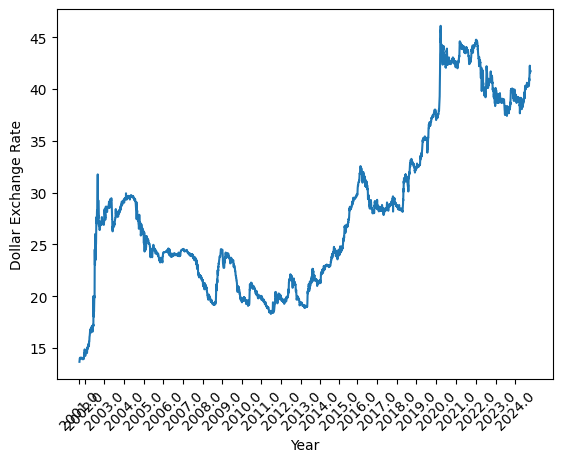

In [36]:
# Nada extraño en una mirada general de todo el Data Frame
plotting(df, "Year")

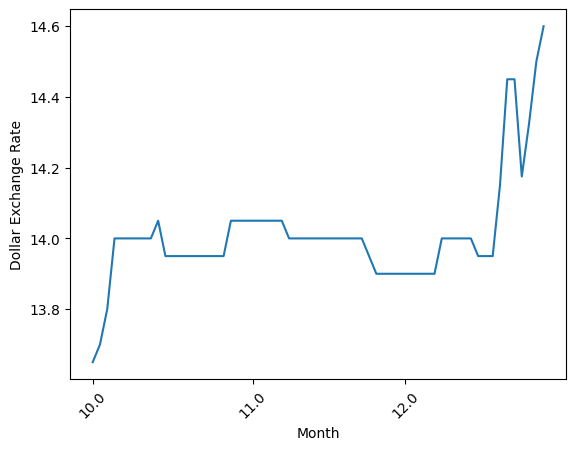

In [37]:
# Aquí se observan algunos mesetas
plotting(df[df["Year"]==2001], "Month")

In [38]:
# Aunque no parecen ser datos de gran precisión, se corresponden bastante con los valores de la época.
# No amerita una desacreditar los datos
df.loc[df["Year"] == 2001, "Dollar_Exchange_Rate"].value_counts()

Dollar_Exchange_Rate
14.000    22
13.950    13
14.050     9
13.900     9
14.450     2
13.650     1
13.700     1
13.800     1
14.150     1
14.175     1
14.325     1
14.500     1
14.600     1
Name: count, dtype: int64

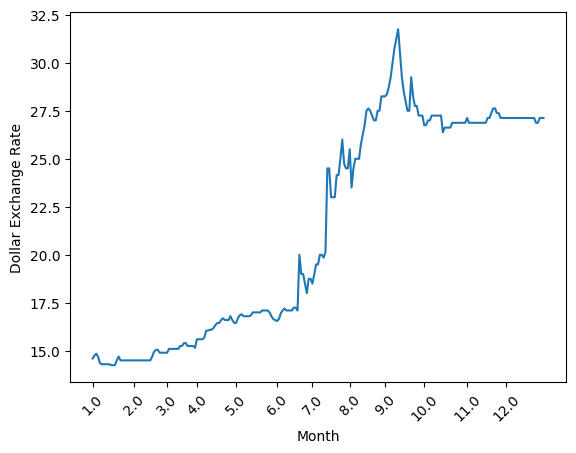

In [39]:
# Pese al alza del dólar, nada en el gráfico induce inconvenientes con los datos
# De hecho, es coherente con cualquier mínimo conocimiento de la situación económica nacional del período
plotting(df[df["Year"]==2002], "Month")

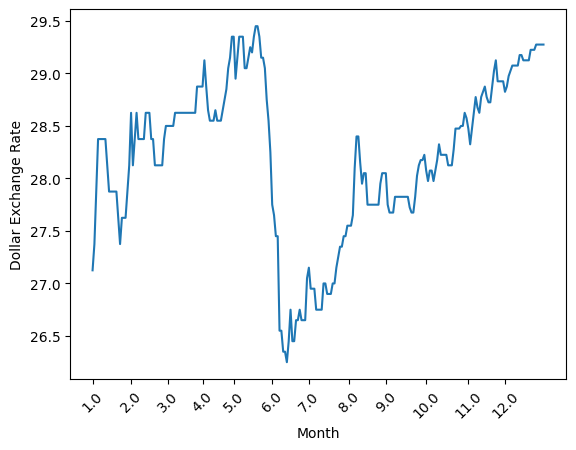

In [40]:
# Hemos corroborado también este desplome del dólar durante el año 2003
# Si bien abrupto, real.
plotting(df[df["Year"]==2003], "Month")

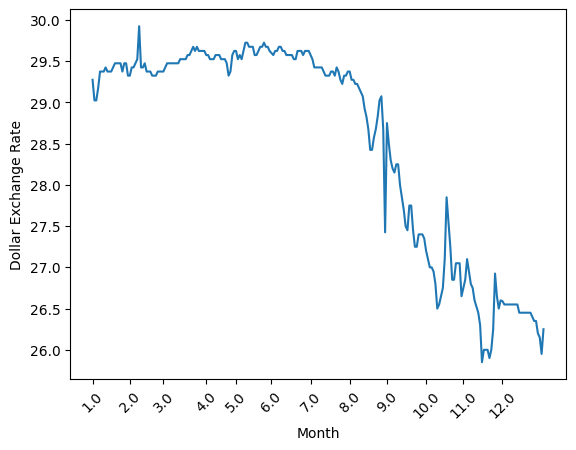

In [41]:
# En 2004 observamos algunos picos que vale la pena investigar
plotting(df[df["Year"]==2004], "Month")

In [42]:
# El primero a finales de agosto
df[(df["Year"]==2004)&(df["Month"] == 8)]

,Date,Dollar_Exchange_Rate,Day_Name,Month_Name,Day,Month,Year,Daily_Change,Monthly_Change,Yearly_Change
691,2004-08-02,29.375,Monday,August,2.0,8.0,2004.0,0.000000,-0.508044,6.624319
692,2004-08-03,29.275,Tuesday,August,3.0,8.0,2004.0,-0.340426,-0.846740,6.261343
693,2004-08-04,29.275,Wednesday,August,4.0,8.0,2004.0,0.000000,-0.509771,5.877034
694,2004-08-05,29.225,Thursday,August,5.0,8.0,2004.0,-0.170794,-0.679694,4.003559
695,2004-08-09,29.225,Monday,August,9.0,8.0,2004.0,0.000000,-0.679694,2.904930
696,2004-08-10,29.175,Tuesday,August,10.0,8.0,2004.0,-0.171086,-0.849618,3.641208
697,2004-08-11,29.125,Wednesday,August,11.0,8.0,2004.0,-0.171380,-1.019541,4.203936
698,2004-08-12,29.075,Thursday,August,12.0,8.0,2004.0,-0.171674,-1.021277,3.654189
699,2004-08-13,28.925,Friday,August,13.0,8.0,2004.0,-0.515907,-1.364024,3.119430
700,2004-08-16,28.825,Monday,August,16.0,8.0,2004.0,-0.345722,-1.705030,3.873874


In [43]:
# Investigada la fecha se concluye que efectivamente ocurrió
df.loc[1061:1070]

,Date,Dollar_Exchange_Rate,Day_Name,Month_Name,Day,Month,Year,Daily_Change,Monthly_Change,Yearly_Change
1061,2006-01-31,24.25,Tuesday,January,31.0,1.0,2006.0,0.0,0.206612,-3.386454
1062,2006-02-01,24.25,Wednesday,February,1.0,2.0,2006.0,0.0,0.206612,-2.020202
1063,2006-02-02,24.25,Thursday,February,2.0,2.0,2006.0,0.0,0.206612,-0.817996
1064,2006-02-03,24.25,Friday,February,3.0,2.0,2006.0,0.0,0.206612,-1.422764
1065,2006-02-06,24.25,Monday,February,6.0,2.0,2006.0,0.0,0.206612,-0.817996
1066,2006-02-07,24.25,Tuesday,February,7.0,2.0,2006.0,0.0,0.206612,-0.817996
1067,2006-02-08,24.25,Wednesday,February,8.0,2.0,2006.0,0.0,0.206612,-0.817996
1068,2006-02-09,24.25,Thursday,February,9.0,2.0,2006.0,0.0,0.206612,-0.817996
1069,2006-02-10,24.25,Friday,February,10.0,2.0,2006.0,0.0,0.206612,-1.622718
1070,2006-02-13,24.25,Monday,February,13.0,2.0,2006.0,0.0,0.206612,-2.610442


In [44]:
# Mirada de cerca, tampoco es sospechosa la distrubución de Octubre
df[(df["Year"]==2004)&(df["Month"] == 10)]

,Date,Dollar_Exchange_Rate,Day_Name,Month_Name,Day,Month,Year,Daily_Change,Monthly_Change,Yearly_Change
732,2004-10-01,27.20,Friday,October,1.0,10.0,2004.0,-0.548446,-5.391304,-2.770331
733,2004-10-04,27.10,Monday,October,4.0,10.0,2004.0,-0.367647,-4.240283,-3.472841
734,2004-10-05,27.00,Tuesday,October,5.0,10.0,2004.0,-0.369004,-4.593640,-3.829029
735,2004-10-06,27.00,Wednesday,October,6.0,10.0,2004.0,0.000000,-4.255319,-3.485255
736,2004-10-07,26.95,Thursday,October,7.0,10.0,2004.0,-0.185185,-4.262877,-4.007124
737,2004-10-08,26.80,Friday,October,8.0,10.0,2004.0,-0.556586,-5.132743,-4.880213
738,2004-10-12,26.50,Tuesday,October,12.0,10.0,2004.0,-1.119403,-6.194690,-6.111603
739,2004-10-13,26.55,Wednesday,October,13.0,10.0,2004.0,0.188679,-5.178571,-5.934455
740,2004-10-14,26.65,Thursday,October,14.0,10.0,2004.0,0.376648,-4.308797,-5.580159
741,2004-10-15,26.75,Friday,October,15.0,10.0,2004.0,0.375235,-3.429603,-5.225864


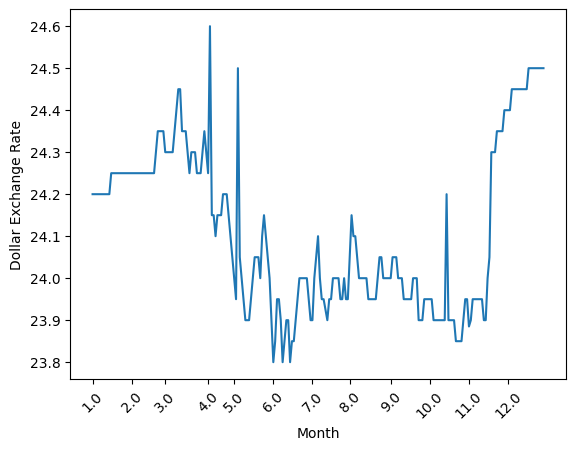

In [45]:
# Los picos durante el año 2006 se explican por el corto rango en el que se movieron los valores
plotting(df[df["Year"]==2006], "Month")

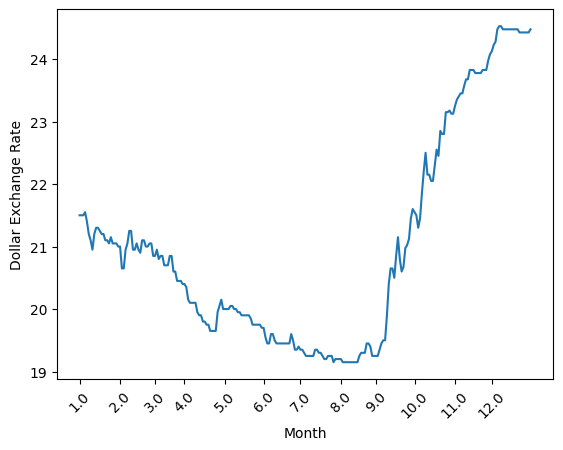

In [46]:
# Evolución orgánica en 2008
plotting(df[df["Year"]==2008], "Month")

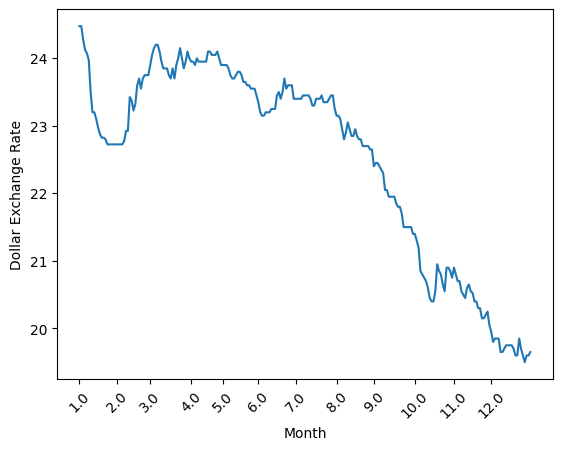

In [47]:
# Lo mismo en 2009
plotting(df[df["Year"]==2009], "Month")

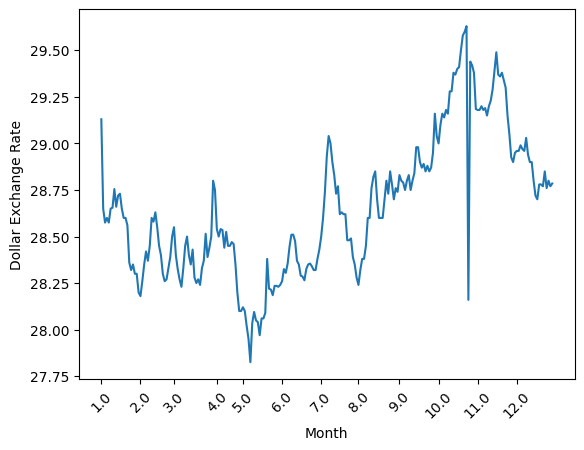

In [48]:
# Para 2017, observamos una caída brusca durante el mes de Octubre
plotting(df[df["Year"]==2017], "Month")

In [49]:
# El pico no se corresponde con los registros de BCU
df[(df["Year"]==2017) & (df["Month"]==10)]

,Date,Dollar_Exchange_Rate,Day_Name,Month_Name,Day,Month,Year,Daily_Change,Monthly_Change,Yearly_Change
3878,2017-10-02,29.000,Monday,October,2.0,10.0,2017.0,-0.137741,0.589664,1.897400
3879,2017-10-03,29.100,Tuesday,October,3.0,10.0,2017.0,0.344828,0.936524,2.573141
3880,2017-10-04,29.160,Wednesday,October,4.0,10.0,2017.0,0.206186,1.250000,3.367600
3881,2017-10-05,29.140,Thursday,October,5.0,10.0,2017.0,-0.068587,1.215700,2.968198
3882,2017-10-06,29.180,Friday,October,6.0,10.0,2017.0,0.137268,1.495652,3.658970
3883,2017-10-09,29.160,Monday,October,9.0,10.0,2017.0,-0.068540,1.144641,3.957219
3884,2017-10-10,29.280,Tuesday,October,10.0,10.0,2017.0,0.411523,1.560874,4.385027
3885,2017-10-11,29.280,Wednesday,October,11.0,10.0,2017.0,0.000000,1.843478,4.571429
3886,2017-10-12,29.380,Thursday,October,12.0,10.0,2017.0,0.341530,2.013889,4.891110
3887,2017-10-13,29.370,Friday,October,13.0,10.0,2017.0,-0.034037,1.837725,4.743224


,Date,Dollar_Exchange_Rate
3894,2017-10-25,29.535


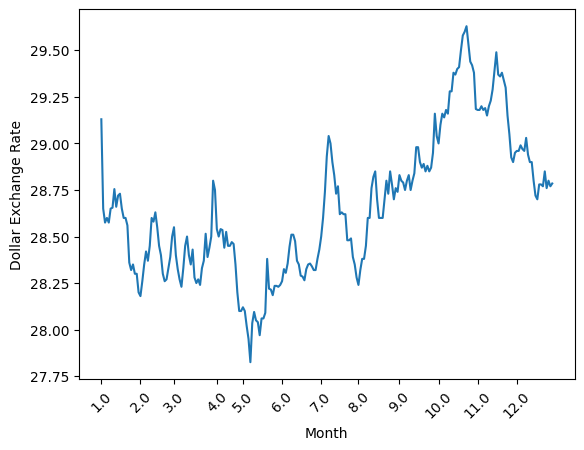

In [50]:
# Mantenemos uniforme la variación de los valores conocidos en su entorno calculando la media
prevValue = float(df.loc[df["Date"]=="2017-10-24", "Dollar_Exchange_Rate"].iloc[0])
nextValue = float(df.loc[df["Date"]=="2017-10-26", "Dollar_Exchange_Rate"].iloc[0])
df.loc[df["Date"]=="2017-10-25", "Dollar_Exchange_Rate"] = (prevValue + nextValue) / 2

plotting(df[df["Year"]==2017], "Month")
display(df.loc[df["Date"]=="2017-10-25", ["Date","Dollar_Exchange_Rate"]])

In [51]:
df

,Date,Dollar_Exchange_Rate,Day_Name,Month_Name,Day,Month,Year,Daily_Change,Monthly_Change,Yearly_Change
0,2001-10-01,13.65,Monday,October,1.0,10.0,2001.0,0.000000,NaN,NaN
1,2001-10-02,13.70,Tuesday,October,2.0,10.0,2001.0,0.366300,NaN,NaN
2,2001-10-03,13.80,Wednesday,October,3.0,10.0,2001.0,0.729927,NaN,NaN
3,2001-10-04,14.00,Thursday,October,4.0,10.0,2001.0,1.449275,NaN,NaN
4,2001-10-05,14.00,Friday,October,5.0,10.0,2001.0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5595,2024-09-27,41.55,Friday,September,27.0,9.0,2024.0,-0.953516,3.229814,7.922078
5596,2024-09-30,41.60,Monday,September,30.0,9.0,2024.0,0.120337,3.097893,7.493540
5597,2024-10-01,41.75,Tuesday,October,1.0,10.0,2024.0,0.360577,3.469641,8.441558
5598,2024-10-02,41.80,Wednesday,October,2.0,10.0,2024.0,0.119760,3.722084,7.870968


In [52]:
# Cargamos las variables de usuario y contraseña
from dotenv import load_dotenv
import os

load_dotenv()

True

In [53]:
# Establecemos la conexión con Postgresql
from sqlalchemy import create_engine

engine = create_engine(
    f"postgresql://{os.environ['PG_USER']}:"
    f"{os.environ['PG_PASSWORD']}@"
    f"{os.environ['PG_HOST']}:"
    f"{os.environ['PG_PORT']}/"
    f"{os.environ['PG_DB']}"
)

In [54]:
# Removemos los espacios y mayúsculas de los nombres de las columnas
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)

In [56]:
# Exportar como db
df.to_sql(
    "exchange_rates",
    engine,
    if_exists="replace",
    index=False
)

600

In [57]:
# Exportar como archivo CSV
df.to_csv("exchange_rates.csv", index=False)